# 預測用

### 程式碼
```python
from ultralytics import YOLO #導入套件
model_path = '' #模型路徑
model = YOLO(model_path) #導入模型

img_path = "" #測試圖片路徑

results = model.predict(
    source=img_path,
    save=True,
    batch=1, 
    project='專案名稱') #預測 

```

| 參數 | 類型 | 說明        |
|------|----|------------|
| save | bool | 儲存預測結果  |
| save_txt | bool | 保存預測結果資訊  |
| save_crop | bool | 保存已裁切圖像  |
| save_frames | bool | 保存單幀  |
| batch | int | 推理的批量大小  |

[參考網址](https://docs.ultralytics.com/zh/modes/predict)


0: 480x640 1 mango, 75.6ms
Speed: 4.0ms preprocess, 75.6ms inference, 84.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to Mango_detect\online_pic19


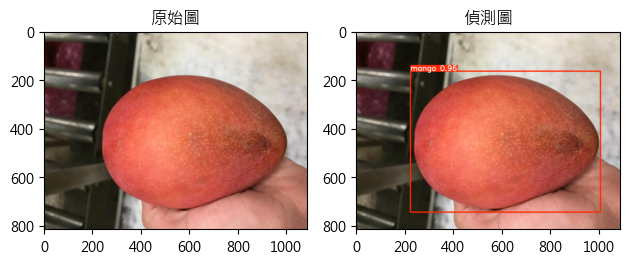

In [1]:
#預測
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# model = YOLO('model/mango_detect.pt') #導入模型
model_path = "model/mango_detect.pt" #模型路徑
model = YOLO(model_path) #導入模型

img_path = "source/C1-P1_Test/A/00006.jpg" #測試圖片路徑

img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#預測
results = model.predict(
    source=img,
    save=True,
    project="Mango_detect",
    name="online_pic") #預測

plt.rcParams['font.family'] = 'Microsoft JhengHei' #設定字體
plt.figure()
plt.subplot(1,2,1)
plt.title("原始圖")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("偵測圖")
plt.imshow(results[0].plot())
plt.tight_layout()
plt.show()

#results = model.predict(source="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Mangos_-_single_and_halved.jpg/500px-Mangos_-_single_and_halved.jpg", save=True,save_txt=True) #預測
# print(results)
# for result in results:
#     boxes = result.boxes
#     print(boxes) #預測框
#     # print(_.boxes.boxes.xyxy) #預測框座標
#     # print(_.boxes.boxes.conf) #預測框置信度
#     # print(_.boxes.boxes.cls) #預測框類別
#     # print(_.masks.masks) #預測遮罩
#     # print(_.masks.masks.shape) #預測遮罩形狀
#     # print(_.masks.masks[0].shape) #預測遮罩形狀
#     # result.show()#顯示預測結果
#     img = cv2.imread(img_path) #讀取圖片
#     # cv2.imshow("img",img) #顯示圖片
#     for x1,y1,x2,y2 in boxes.xyxyn: #遍歷預測框
#         print("xyxy:",x1,y1,x2,y2)
#         # xyxy = i.tolist() #轉換為一般列表
#         # print("xyxy2:",xyxy)
#         # print(type(xyxy[0]))   
#         cv2.rectangle(img,
#                     (int(x1), int(y1)), #左上角座標
#                     (int(x2), int(y2)), #右下角座標
#                     (0, 255, 0), #顏色
#                     )
#         cv2.imshow("123",img)
#     cv2.waitKey(0) #等待鍵盤事件

In [2]:
#預測
from ultralytics import YOLO
import cv2
# model = YOLO('model/mango_detect.pt') #導入模型
model_path = "model/mango_detect.pt" #模型路徑
model = YOLO(model_path) #導入模型

results = model.predict(
    source=0, #0為攝影機
    save=True,
    project="Mango_detect",
    name="online_pic",
    show=True,
    conf=0.6, #置信度，減少誤報
    # save_frames=True, #保存每一幀,
    # save_crop=True, #保存每一幀的預測框
    ) #預測


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)

WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 480x640 (no detections), 15.3ms
0: 480x640 (no detections), 8.9ms
0: 480x640 (no detections), 11.0ms
0: 480x640 (no detections), 10.8ms
0: 480x640 (no detections), 10.8ms
0: 480x640 (no detections), 8.9ms
0: 480x640 (no detections), 9.2ms
0: 480x640 (no detections), 11.2ms
0: 480x640 (no detections), 12.1ms
0: 480x640 (no detections), 9.6ms
0: 480x640 (no detections), 10.9ms
0: 480x640 (no 

KeyboardInterrupt: 

In [ ]:
#使用 yolov11 seg 預測

from ultralytics import YOLO
import cv2

# model_path = r"model\yolo11n-seg.pt" #模型路徑(原始Coco)
model_path = r"Mango_training\train_yolo11-seg\weights\best.pt"


model = YOLO(model_path) #導入模型
# img_path = "https://image-cdn.learnin.tw/bnextmedia/image/album/2018-01/img-1515398565-99051.jpg" #測試圖片路徑(dog)

img_path = r"source\C1-P1_Test\C\00079.jpg"

results = model.predict(
    source=img_path, #測試圖片路徑
    save=True,
    project="Mango_detect",
    name="online_pic") #預測

mask = results[0].masks.xy #獲取預測遮罩
print(mask) #預測遮罩
img = results[0].plot() #繪製預測結果
cv2.imshow('img', img) #顯示預測結果
cv2.imshow('mask', mask) #顯示預測結果
cv2.waitKey(0) #等待鍵盤輸入
cv2.destroyAllWindows() #關閉所有視窗



image 1/1 d:\\\\source\C1-P1_Test\C\00079.jpg: 480x640 1 mango, 88.4ms
Speed: 3.1ms preprocess, 88.4ms inference, 106.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to Mango_detect\online_pic15
[array([[        525,          63],
       [        525,        69.3],
       [      522.9,        71.4],
       ...,
       [      829.5,        71.4],
       [      827.4,        69.3],
       [      827.4,          63]], dtype=float32)]


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat is not a numpy array, neither a scalar
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'


: 

In [5]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


In [1]:
from pathlib import Path
from ultralytics import YOLO
models = ['mango_detect_seg_v2','mango_detect_coco_v1']
# base_img_path = 'datasets/mango/val/images'
base_img_path = 'test/test_img'


for modelName in models:
    model = YOLO(f'model/{modelName}.pt')
    # img_paths = list(Path(base_img_path).glob('*.jpg'))
    # print(img_paths)
    # print(model.info)
    # model.info
    model.predict(base_img_path,device=0,batch=16,project="Mango_predict",name=f'{modelName}_v4',save=True)



image 1/300 d:\\\\test\test_img\00001.jpg: 640x640 1 mango, 6 mango_blackdots, 4.3ms
image 2/300 d:\\\\test\test_img\00025.jpg: 640x640 1 mango, 3 mango_blackdots, 4.3ms
image 3/300 d:\\\\test\test_img\00074.jpg: 640x640 1 mango, 1 mango_blackdot, 4.3ms
image 4/300 d:\\\\test\test_img\00079.jpg: 640x640 1 mango, 2 mango_blackdots, 4.3ms
image 5/300 d:\\\\test\test_img\00095.jpg: 640x640 1 mango, 5 mango_blackdots, 4.3ms
image 6/300 d:\\\\test\test_img\00124.jpg: 640x640 1 mango, 4.3ms
image 7/300 d:\\\\test\test_img\00146.jpg: 640x640 1 mango, 4.3ms
image 8/300 d:\\\\test\test_img\00151.jpg: 640x640 1 mango, 5 mango_blackdots, 4.3ms
image 9/300 d:\\\\test\test_img\00155.jpg: 640x640 1 mango, 10 mango_blackdots, 4.3ms
image 10/300 d:\\\\test\test_img\00156.jpg: 640x640 1 mango, 1 mango_blackdot, 4.3ms
image 11/300 d:\\\\test\test_img\00169.jpg: 640x640 1 mango, 1 mango_blackdot, 4.3ms
image 12/300 d:\\\\test\test_img\00188.jpg: 640x640 1 mango, 3 mango_blackdots, 4.3ms
image 13/300 d:\